# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans_model = KMeans(n_clusters=8, random_state=42).fit(X)


labels = kmeans_model.labels_


silhouette_score = silhouette_score(X, labels)

print(silhouette_score)

0.5398971441034114


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans_model = KMeans(n_clusters=5, random_state=42).fit(X)


labels = kmeans_model.labels_


silhouette_score = silhouette_score(X, labels)

print(silhouette_score)

0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans_model = KMeans(n_clusters=3, random_state=42).fit(X)


labels = kmeans_model.labels_


silhouette_score = silhouette_score(X, labels)

print(silhouette_score)

0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [19]:
%pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn import cluster, datasets
from yellowbrick.cluster import KElbowVisualizer

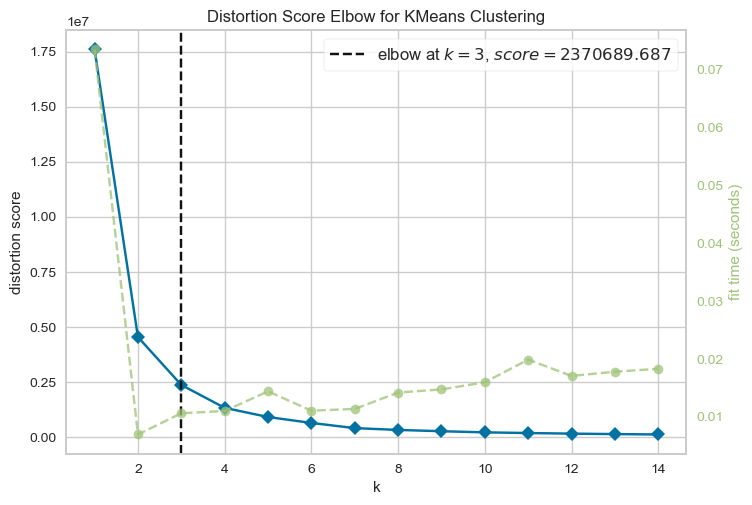

In [21]:
modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

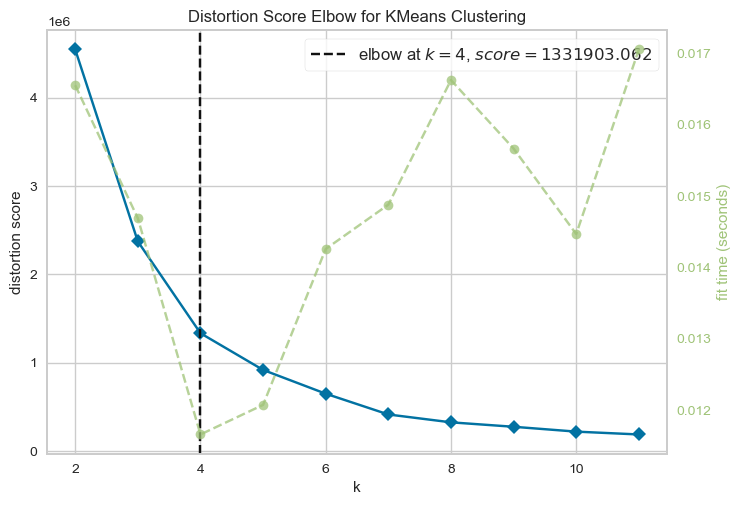

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
visualizer = KElbowVisualizer(modelo, k=(2,12), metric='distortion')
visualizer.fit(X)
visualizer.show()

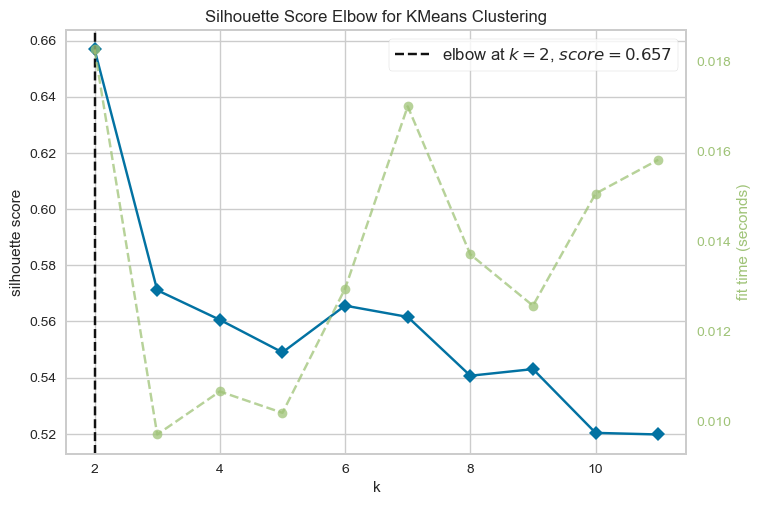

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
visualizer = KElbowVisualizer(modelo, k=(2,12), metric='silhouette')
visualizer.fit(X)
visualizer.show()

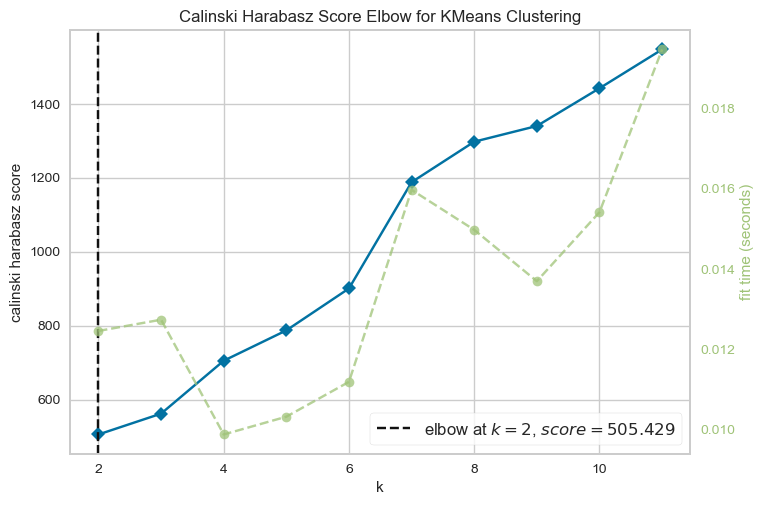

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [24]:
visualizer = KElbowVisualizer(modelo, k=(2,12), metric='calinski_harabasz')
visualizer.fit(X)
visualizer.show()


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

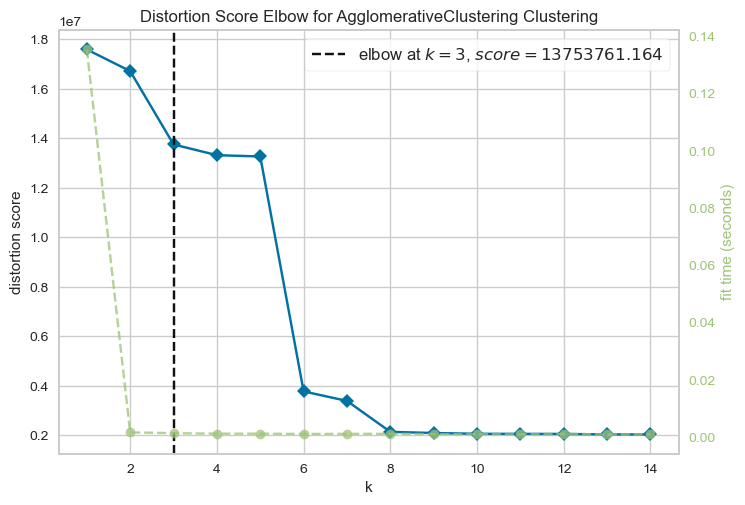

In [25]:
modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')

visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

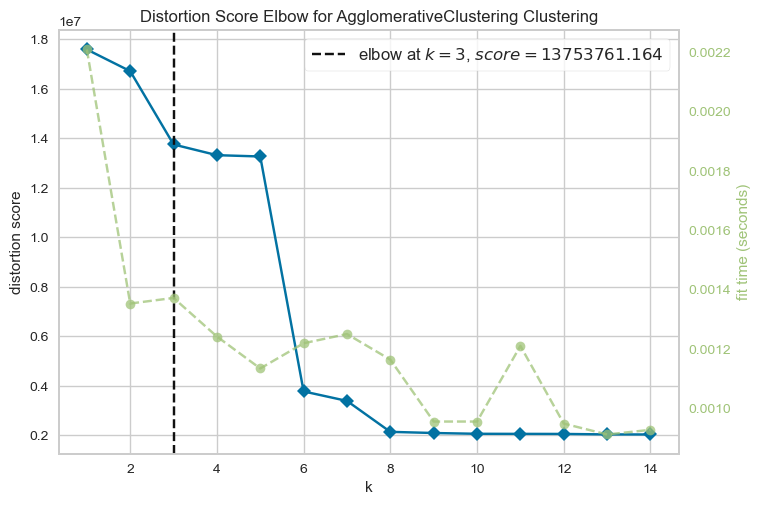

In [26]:
modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')

visual=KElbowVisualizer(modelo, k=(1, 15),metric='distortion')

visual.fit(X)

visual.poof();

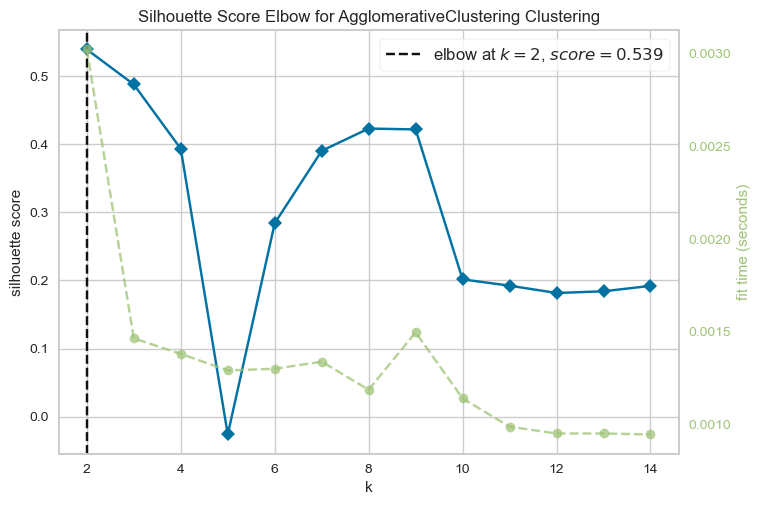

In [27]:
modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')

visual=KElbowVisualizer(modelo, k=(2, 15),metric='silhouette')

visual.fit(X)

visual.poof();

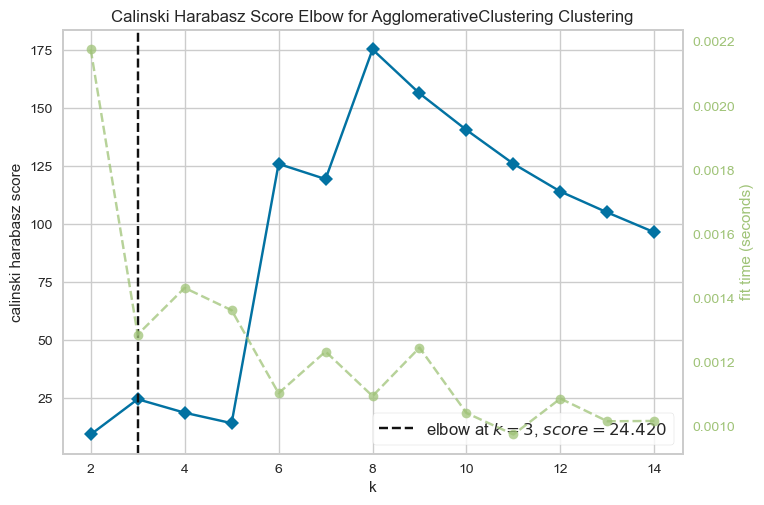

In [28]:
visual=KElbowVisualizer(modelo, k=(2, 15),metric='calinski_harabasz')

visual.fit(X)

visual.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

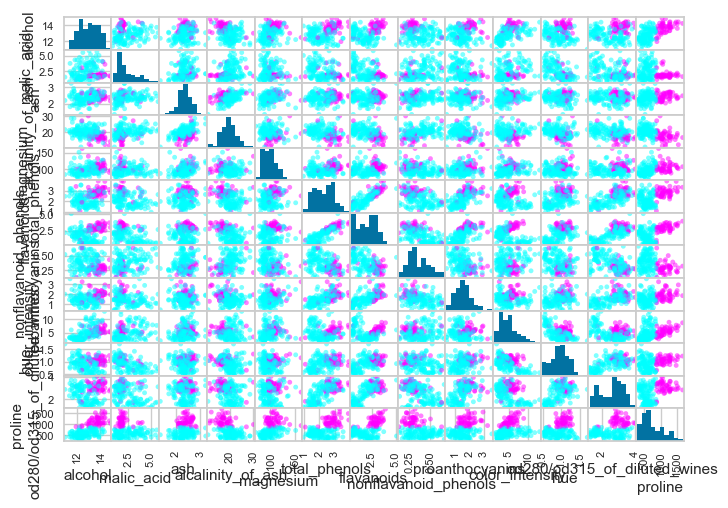

In [29]:
kmeans=KMeans(n_clusters=2)
pred = kmeans.fit(X).labels_
pd.plotting.scatter_matrix(X, c=pred,cmap='cool');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

pca_x.shape

(178, 13)

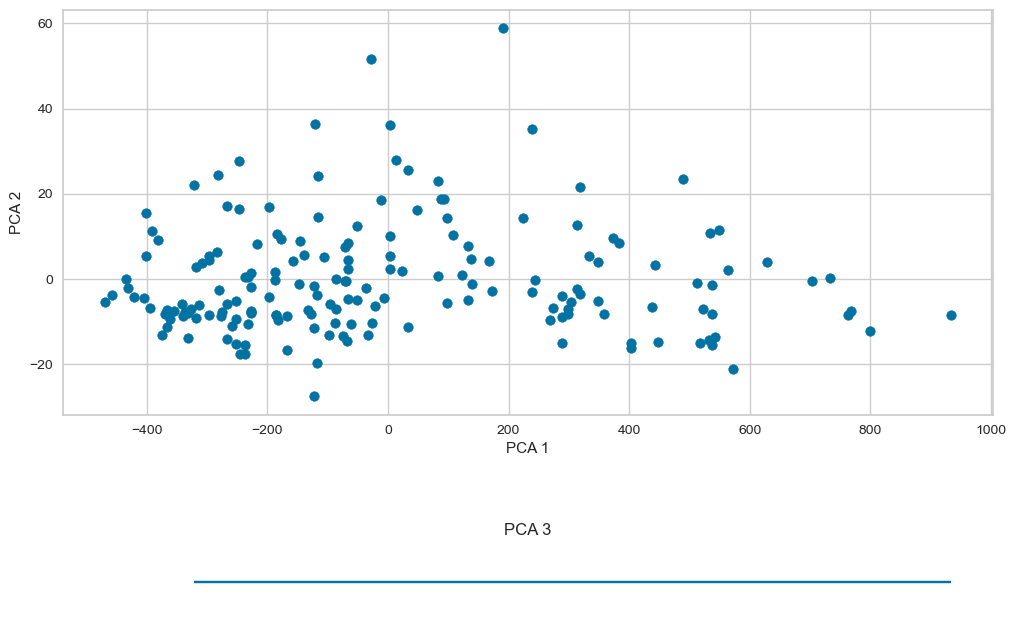

In [32]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])

ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [33]:
from sklearn.manifold import TSNE


/Users/fernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/fernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/fernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/fernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/fernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users

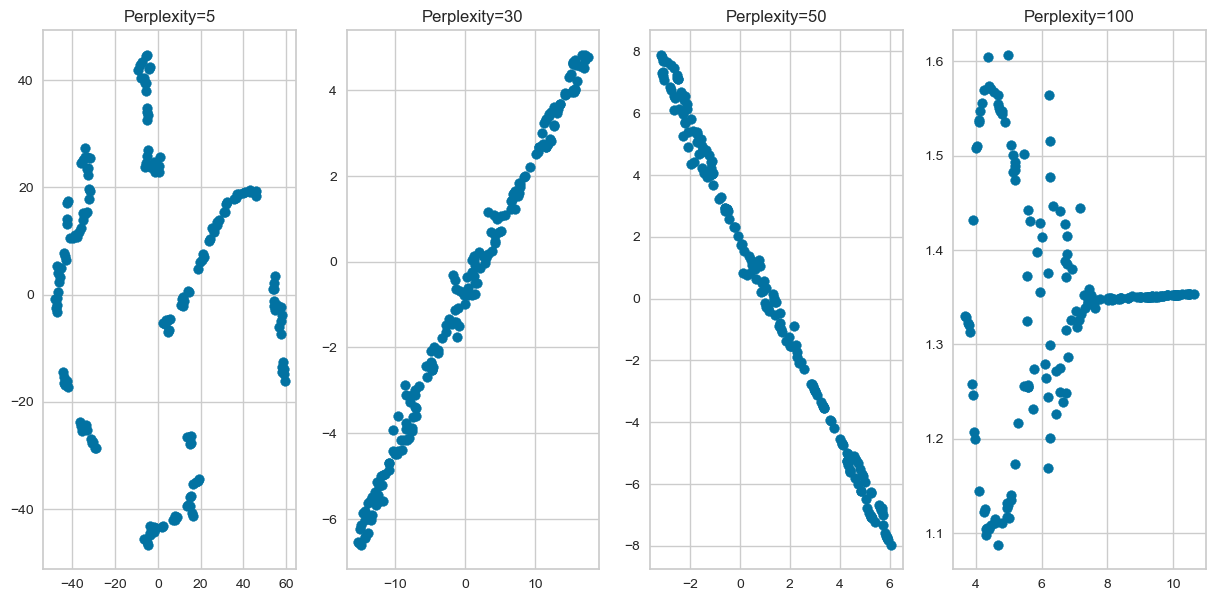

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1])
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();